# Linear Regression

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
X_driving_hours = [10, 9, 2, 15, 10, 16, 11, 16]
y_risk_score = [95, 80, 10, 50, 45, 98, 38, 93]

In [9]:
#helper functions

def mean(values):
    return sum(values)/float(len(values))

def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

def covariance(x,x_mean,y,y_mean):
    covar=0
    for i in range(len(x)):
        covar+= (x[i]-x_mean) * (y[i]-y_mean)
    return covar


def find_coffiecients(x,y):
    x_mean,y_mean=mean(x),mean(y)
    b1= covariance(x,x_mean,y,y_mean)/ variance(x,x_mean)
    b0= y_mean - b1 * x_mean
    return [b0,b1]


def Linear_regression(X_train, Y_train, X_test):
    predictions= list()
    b0,b1= find_coffiecients(X_train, Y_train)
    for row in X_test:
        yhat= b0+b1*row
        predictions.append(yhat)
    return predictions


def absline(slope, intercept):
    axes=plt.gca()
    x_values= np.array(axes.get_xlim())
    y_values= slope+intercept* x_values
    plt.plot(x_values,y_values,"--")

In [10]:


b0,b1= find_coffiecients(X_driving_hours,y_risk_score)
print('Cofficients b0=%.3f , b1=%.3f' % (b0,b1)) 

Cofficients b0=12.585 , b1=4.588


In [32]:
from sklearn.linear_model import LinearRegression
x=np.array(X_driving_hours).reshape(-1,1)
y=np.array(y_risk_score).reshape(-1,1)

lm=LinearRegression().fit(x,y)


[[10]
 [ 9]
 [ 2]
 [15]
 [10]
 [16]
 [11]
 [16]]
[[95]
 [80]
 [10]
 [50]
 [45]
 [98]
 [38]
 [93]]


In [12]:
lm.coef_

array([[4.58789861]])

In [13]:
lm.intercept_

array([12.58462796])

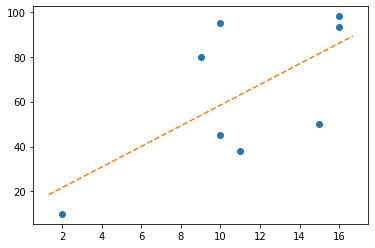

In [14]:
plt.plot(X_driving_hours, y_risk_score, "o")
absline(b0, b1)

In [24]:
n=int(input("Enter the number of predictions"))
results=[]

for i in range(0,n):
    ele=int(input())
    results.append(ele)
    
predictions=Linear_regression(X_driving_hours,y_risk_score,results)
print(predictions)

Enter the number of predictions8
1
2
3
4
5
6
7
8
[17.17252657399836, 21.760425183973833, 26.348323793949305, 30.936222403924774, 35.52412101390024, 40.11201962387571, 44.699918233851186, 49.287816843826654]


Accuracy : 43.709481451010035
[49.28781684]
Enter the no of hours:10
y = 4.587899*10.000000+12.584628
Risk Score :  58.4636140637776


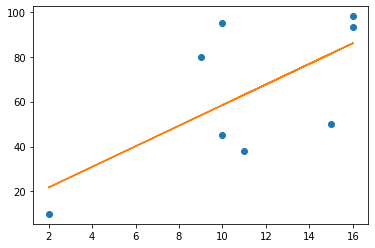

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Read Dataset
dataset=pd.read_csv("hours.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values


# Import the Linear Regression and Create object of it
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,y)
print ("Accuracy :", regressor.score(X, y)*100)
#print("Accuracy :")
#print(Accuracy)

# Predict the value using Regressor Object
y_pred=regressor.predict([[8]])
print(y_pred)

# Take user input
hours=int(input('Enter the no of hours:'))

#calculate the value of y
eq=regressor.coef_*hours+regressor.intercept_
print ('y = %f*%f+%f' %(regressor.coef_,hours,regressor.intercept_))
#print("y :")
#print(y)
print("Risk Score : ", eq[0])
plt.plot(X,y,'o')
plt.plot(X,regressor.predict(X));
plt.show()


In [29]:
from math import sqrt

def rmse(actual, predicted):
    sum_err = 0.0
    for i in range(float(len(actual))):
        pred_err = predicted[i] - actual[i]
        sum_err += pred_err**2
    mean_err = sum_err / float(len(actual))
    return sqrt(mean_err)

In [30]:
rmse(y_risk_score, predictions)

43.98311240825254

# Decision Tree from Scratch

In [33]:
import pandas as pd
import numpy as np

#reading Dataset
dataset=pd.read_csv("sample.csv")
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,5]

#Perform Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

X=X.apply(le.fit_transform)
print(X)

from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier()
regressor.fit(X.iloc[:,1:5],y)

#Predict value for the given Expression
X_in=np.array([1,1,0,0])
y_pred=regressor.predict([X_in])
print("Prediction:", y_pred)
from sklearn.externals.six import StringIO

from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data=StringIO()

export_graphviz(regressor,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')


    ID  Age  Income  Gender  Marital Status
0    0    1       0       1               1
1    1    1       0       1               0
2    2    0       0       1               1
3    3    2       2       1               1
4    4    2       1       0               1
5    5    2       1       0               0
6    6    0       1       0               0
7    7    1       2       1               1
8    8    1       1       0               0
9    9    2       2       0               1
10  10    1       2       0               0
11  11    0       2       1               0
12  12    0       0       0               1
13  13    2       2       1               0
Prediction: ['Yes']


C:\Users\ANIKET GHULE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


InvocationException: GraphViz's executables not found

In [4]:
!pip install --upgrade scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ANIKET GHULE\\anaconda3\\Lib\\site-packages\\~klearn\\utils\\murmurhash.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
!pip install --upgrade pyspark


In [ ]:
!pip install six 

In [ ]:
!conda install python-graphviz

In [34]:
"""
Make the imports of python packages needed
"""
import pandas as pd
import numpy as np

import json


#Import the dataset and define the feature as well as the target datasets / columns#
dataset = pd.read_csv('sample.csv')



def entropy(target_col):
   
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy


def InfoGain(data,split_attribute_name,target_name="class"):
  
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain


def ID3(data,originaldata,features,target_attribute_name="Buys",parent_node_class = None):
    
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    

    
    elif len(features) ==0:
        return parent_node_class
    
    
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features] #Return the information gain values for the features in the dataset
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        tree = {best_feature:{}}
        
        
        features = [i for i in features if i != best_feature]
        
        
        for value in np.unique(data[best_feature]):
            value = value'
            sub_data = data.where(data[best_feature] == value).dropna()
            
            subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
            
            tree[best_feature][value] = subtree
            
        return(tree)
    
    
def predict(query,tree,default = 1):
    """
    Prediction of a new/unseen query instance. This takes two parameters:
    1. The query instance as a dictionary of the shape {"feature_name":feature_value,...}
    2. The tree 
    """
    
    #1.
    for key in list(query.keys()):
        if key in list(tree.keys()):
            #2.
            try:
                result = tree[key][query[key]] 
            except:
                return default
  
            #3.
            result = tree[key][query[key]]
            #4.
            if isinstance(result,dict):
                return predict(query,result)

            else:
                return result

                
training_data = dataset.drop('ID', axis=1) 

"""
Train the tree and Print the tree
"""
tree = ID3(training_data,training_data,training_data.columns[:-1])
print(json.dumps(tree, indent=4))


#: Query Testing
query = {'Age': '>35','Income': 'Medium','Gender': 'Male','Marital Status': 'Single'}
print('-'*80)
print('-'*34, 'Prediction','-'*34)
print(f'Given : ')
print(query)
print(f'Answer for Buy\'s dependent variable: {predict(query, tree)}')
print('-'*80)

{
    "Age": {
        "21-35": "Yes",
        "<21": {
            "Gender": {
                "Female": "Yes",
                "Male": "No"
            }
        },
        ">35": {
            "Marital Status": {
                "Married": "No",
                "Single": "Yes"
            }
        }
    }
}
--------------------------------------------------------------------------------
---------------------------------- Prediction ----------------------------------
Given : 
{'Age': '>35', 'Income': 'Medium', 'Gender': 'Male', 'Marital Status': 'Single'}
Answer for Buy's dependent variable: Yes
--------------------------------------------------------------------------------


# KNN

In [ ]:
import math
import numpy as np

In [ ]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return math.sqrt(distance)

In [ ]:
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(train_row, test_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [ ]:
train_data = [[2, 4, "Orange"], [4, 4, "Blue"], [4, 6, "orange"], [4, 2, "orange"], [6, 2, "Blue"], [6, 4, "Orange"]]
test_data = [[3, 1],[6,6],[2,3]]

for item in test_data:
    print("Data point : ", item)
    neighbors = get_neighbors(train_data, item, 3)
    print("Nearest Neighbors : ", neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    print("Prediction : ", prediction, "\n")

In [ ]:
#import the packages
import pandas as pd
import numpy as np

#Read dataset
dataset=pd.read_csv("knndata.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,2].values

#import KNeighborshood Classifier and create object of it
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(X,y)

#predict the class for the point(6,6)
X_test=np.array([6,2])
y_pred=classifier.predict([X_test])
print ('General KNN:',y_pred)

classifier=KNeighborsClassifier(n_neighbors=3,weights='distance')
classifier.fit(X,y)

#predict the class for the point(6,6)
X_test=np.array([6,2])
y_pred=classifier.predict([X_test])
print ('Distance Weighted KNN:',y_pred)

# K-MEANS

Result of k-Means Clustering: 

data point: [0.1 0.6]
cluster number: 0 

data point: [0.15 0.71]
cluster number: 0 

data point: [0.08 0.9 ]
cluster number: 0 

data point: [0.16 0.85]
cluster number: 0 

data point: [0.2 0.3]
cluster number: 1 

data point: [0.25 0.5 ]
cluster number: 1 

data point: [0.24 0.1 ]
cluster number: 1 

data point: [0.3 0.2]
cluster number: 1 

Last centroids position: 
 [[0.13333333 0.828     ]
 [0.27066667 0.22      ]]


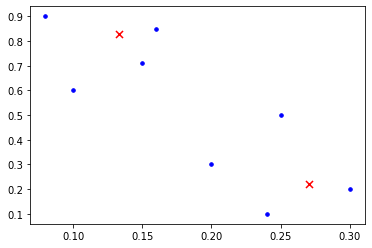

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os

def compute_euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))

def assign_label_cluster(distance, data_point, centroids):
    index_of_minimum = min(distance, key=distance.get)
    return [index_of_minimum, data_point, centroids[index_of_minimum]]

def compute_new_centroids(cluster_label, centroids):
    return np.array(cluster_label + centroids)/2

def iterate_k_means(data_points, centroids, total_iteration):
    label = []
    cluster_label = []
    total_points = len(data_points)
    k = len(centroids)
    
    for iteration in range(0, total_iteration):
        for index_point in range(0, total_points):
            distance = {}
            for index_centroid in range(0, k):
                distance[index_centroid] = compute_euclidean_distance(data_points[index_point], centroids[index_centroid])
            label = assign_label_cluster(distance, data_points[index_point], centroids)
            centroids[label[0]] = compute_new_centroids(label[1], centroids[label[0]])

            if iteration == (total_iteration - 1):
                cluster_label.append(label)

    return [cluster_label, centroids]

def print_label_data(result):
    print("Result of k-Means Clustering: \n")
    for data in result[0]:
        print("data point: {}".format(data[1]))
        print("cluster number: {} \n".format(data[0]))
    print("Last centroids position: \n {}".format(result[1]))

def create_centroids():
    centroids = []
    centroids.append([0.1, 0.3])
    centroids.append([0.6, 0.2])
    return np.array(centroids)

def draw_plot(data_points, centroids):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(data_points[:, 0], data_points[:, 1], s= 50, c = 'b', marker = '.', label = 'data')
    ax.scatter(centroids[:,0], centroids[:,1], s = 50, c = 'r', marker = 'x', label = 'centroids')

    plt.savefig('plot.jpg')

if __name__ == "__main__":
    filename = os.path.dirname('kmeans.py') + "kmeansdata.csv"
    data_points = np.genfromtxt(filename, delimiter=",")
    centroids = create_centroids()
    total_iteration = 100
    
    [cluster_label, new_centroids] = iterate_k_means(data_points, centroids, total_iteration)
    print_label_data([cluster_label, new_centroids])
    
    draw_plot(data_points, new_centroids)

[[0.1  0.6 ]
 [0.15 0.71]
 [0.08 0.9 ]
 [0.16 0.85]
 [0.2  0.3 ]
 [0.25 0.5 ]
 [0.24 0.1 ]
 [0.3  0.2 ]]


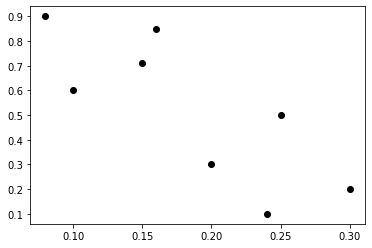

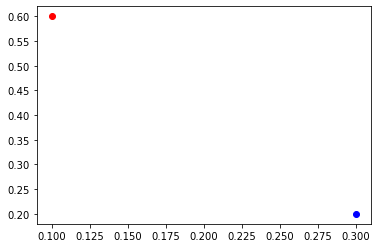

[[0.1 0.3]
 [0.6 0.2]]


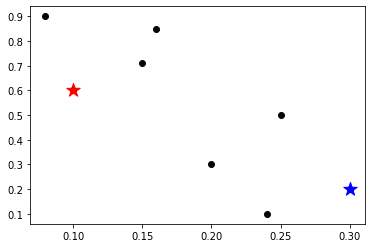

[1 1 1 1 0 0 0 0]


In [37]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#create dataset using DataFrame
df=pd.DataFrame({'X':[0.1,0.15,0.08,0.16,0.2,0.25,0.24,0.3],
                 'y':[0.6,0.71,0.9,0.85,0.3,0.5,0.1,0.2]})
f1 = df['X'].values
f2 = df['y'].values
X = np.array(list(zip(f1, f2)))
print(X)

#centroid points
C_x=np.array([0.1,0.3])
C_y=np.array([0.6,0.2])
centroids=C_x,C_y

#plot the given points
colmap = {1: 'r', 2: 'b'}
plt.scatter(f1, f2, color='k')
plt.show()

#for i in centroids():
plt.scatter(C_x[0],C_y[0], color=colmap[1])
plt.scatter(C_x[1],C_y[1], color=colmap[2])
plt.show()

C = np.array(list((C_x, C_y)), dtype=np.float32)
print (C)

#plot given elements with centroid elements
plt.scatter(f1, f2, c='#050505')
plt.scatter(C_x[0], C_y[0], marker='*', s=200, c='r')
plt.scatter(C_x[1], C_y[1], marker='*', s=200, c='b')
plt.show()


#import KMeans class and create object of it
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2,random_state=0)
model.fit(X)
labels=model.labels_
print(labels)

#using labels find population around centroid
count=0
for i in range(len(labels)):
    if (labels[i]==1):
        count=count+1